<a href="https://colab.research.google.com/github/jgp20/HCSPD2024/blob/main/Actividades_Clase6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e
#-------#2min la JULIA_VERSION="1.10.2", dar F5--------------------------------------------#
JULIA_VERSION="1.10.2" # any version ≥ 0.7.0 iba 8 en lugar de 10
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#
if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz
  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done
  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia
  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.10.2 on the current Colab Runtime...
2024-06-02 14:10:55 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz [169654402/169654402] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
Luego de hacer F5: La función `versioninfo()` debería imprimir la versión de Julia y alguna información del sistema:

In [250]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Uso de JULIA en Colab.
A patir de acá, se puede emplear toda la funcionalidad de JULIA.
La documentación está en sitios como https://docs.sciml.ai/Overview/stable/

y

http://web.mit.edu/julia_v0.6.2/julia/share/doc/julia/html/en/index.html

Para Visual Studio: https://www.julia-vscode.org/docs/dev/userguide/keyboard/


El detalle del toolbox de Control está en
https://juliacontrol.github.io/ControlSystems.jl/stable/
#Instrucciones recomendadas
Para la simulación de procesos dinámicos, es muy útil emplear las instrucciones básicas para control y cálculo numérico.

In [ ]:
using Pkg;
Pkg.add("Plots") #5min

In [251]:
using Plots

Cargar de librearías para interpretar Latex en los plot.

In [120]:
#import Pkg;
# using Pkg;
Pkg.add("LaTeXStrings")
using LaTeXStrings

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [128]:
v1=[1  6 7 8 ]
v2=hvcat(2, 1.0 , 2.0 ,3.0 ,4.0,5.0,6.0)
v3=[2 3 ;  1.0 5]
print(v1,"\n\n",v2,"\n\n",v3,"\n\n")
v2

[1 6 7 8]

[1.0 2.0; 3.0 4.0; 5.0 6.0]

[2.0 3.0; 1.0 5.0]



3×2 Matrix{Float64}:
 1.0  2.0
 3.0  4.0
 5.0  6.0

# **Cicuito R-L-C**



#Solución analítica

R=1$\Omega$, L=1Hy, y C=1F.

Entrada de tensión escalón de 12V

Simulación 3 segundos

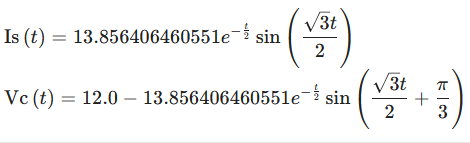

13.85640640551 = 8 √3

In [200]:
h=1e-4;
t_simul=3;
N_val= trunc(Int,t_simul/h);

Ve=Array{Float64,1}(undef, N_val);  # Tensión de entrada 12 Vdc
Is=Array{Float64,1}(undef, N_val);  # Corriente
Vc=Array{Float64,1}(undef, N_val);  # Tensión en capacitor
t=0:t_etapa:tF-t_etapa;
u=0;
for ii = 1:N_val
  Ve[ii] = u;
  Is[ii] = 8*sqrt(3)*exp(-t[ii]/2)*sin(t[ii]*sqrt(3)/2);
  Vc[ii] = 12- 8*sqrt(3) *exp(-t[ii]/2)*sin(t[ii]*sqrt(3)/2+pi/3);
  u=12;
end

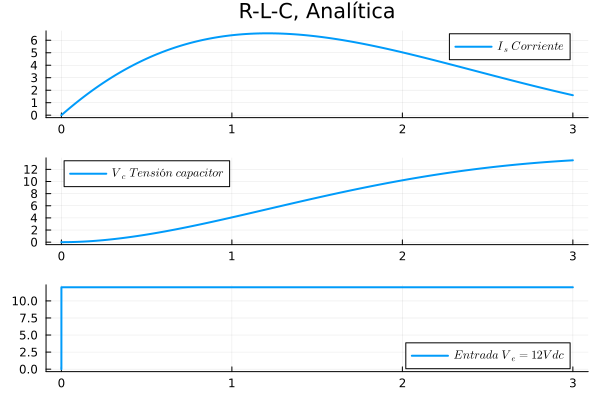

In [201]:
P1=plot(t, Is, label=L"I_s \ Corriente ", lw=2)
title!(P1,"R-L-C, Analítica")
P2=plot(t, Vc, label=L"V_c \ Tensión\ capacitor", lw=2)
P3=plot(t, Ve, label=L"Entrada \ V_e = 12Vdc", lw=2)
#ylims!(0, 15)
#xlims!(0, 10)
Fig = plot(P1, P2, P3, layout=(3,1) )
savefig(Fig,"CiruitoRLC_Analitica.png")
savefig(Fig,"CiruitoRLC_Analitica.pdf")
savefig(Fig,"CiruitoRLC_Analitica.svg")
Fig

# Empleando Euler

1 - R=1Ω, L=1Hy, y C=1F. Entrada de tensión escalón de 12V



Simulación 3 segundos, empleando el cálculo mediante Euler

In [288]:
#Funcion modelo
function modrlc(t_etapa, Xant, accion)
    h = 1e-5
    R=1; L=1; C=1   # Valor de resistencia, inductancia y capacidad par el circuito R-L-C
    A=[-R/L  -1/L ; 1/C  0]  # A = hvcat(2, -R/L, -1/L, 1/C, 0)
    B=[1/L ; 0]              # A = hvcat(1, 1/L, 0)
    u=accion
    X=Xant
    for ii = 1:t_etapa/h
      Xp = A * X + B * u
      X = X + Xp * h
    end
    return X
end


modrlc (generic function with 1 method)

In [289]:
X=[0.0;0.0]  # valores iniciales

t_etapa=1e-4;
tF=3;  # Tiempo de simulación
N_val= trunc(Int,tF/t_etapa);

x1=Array{Float64,1}(undef, N_val); #corriente, una columna con N_val elementos
x2=Array{Float64,1}(undef, N_val); #tension en el capacitor, una columna con N_val elementos
acc=Array{Float64,1}(undef, N_val); #entrada 12 Vdc, una columna con N_val elementos
t=0:t_etapa:tF-t_etapa;
u=0.0; # Entrada, escalón de 12 Vdc
for ii = 1: N_val
  x1[ii]= X[1];
  x2[ii]= X[2];
  X=modrlc(t_etapa, X, u) # Funcion "modrlc()" en celda superior
  acc[ii]=u;
  u=12.0;
end
N_val




30000

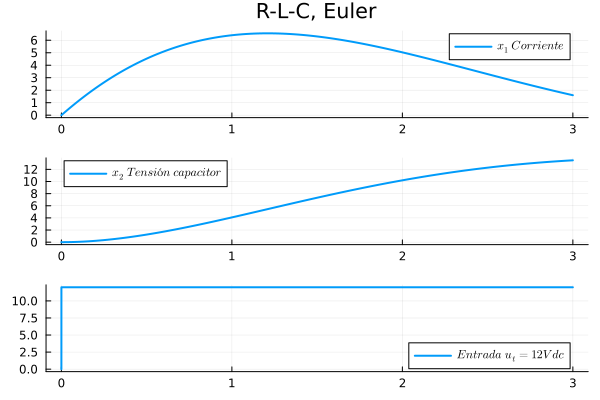

In [290]:

P1=plot(t, x1, label=L"x_1 \ Corriente ", lw=2)  # lw=range(0, 5, length=N_val)
title!(P1,"R-L-C, Euler")
P2=plot(t, x2, label=L"x_2 \ Tensión\ capacitor", lw=2)
P3=plot(t, acc, label=L"Entrada \ u_t = 12Vdc", lw=2)
#ylims!(0, 15)
#xlims!(0, 10)
Fig = plot(P1, P2, P3, layout=(3,1) )
#plot(P1, P2, P3, layout=grid(3, 1, heights=[0.8 ,0.2, 1.1]))
savefig(Fig,"CiruitoRLC_Euler.png")
savefig(Fig,"CiruitoRLC_Euler.pdf")
savefig(Fig,"CiruitoRLC_Euler.svg")
Fig

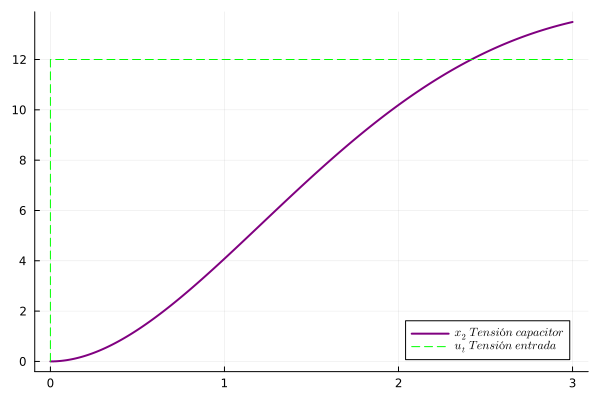

In [291]:
#Tensión de entrada y tensión de capacitor en el mismo gráfico
datos= [ x2 acc]
plot(t, datos, label=[ L"x_2 \ Tensión\ capacitor"  L"u_t \ Tensión\ entrada"] , lw=[2  1], color = ["purple" colorant"#00ff00"], style = [:solid :dash])


## Cálculo simbólico
En Julia es posible realizar cálculo simbólico, pero **no es** posible obtener soluciones analíticas de ecuaciones diferenciales.
https://symbolics.juliasymbolics.org/stable/

In [ ]:
Pkg.add("Symbolics") #3min en Colab, 2min en visualstudio

In [186]:
using Symbolics

In [189]:
@variables x y z
z = (x^2)^(1/2)+y*z


x + y*z

\begin{equation}
x + y z
\end{equation}


In [191]:
@variables x y z
e1 = (x^2)^(1/2)+y*z ~ z
Symbolics.solve_for(e1,z)

x / (1 - y)

\begin{equation}
\frac{x}{1 - y}
\end{equation}


In [196]:
@variables t x y z
ex0 = -4//3 * x + y ~ 2
Symbolics.solve_for(ex0, x)

(3//4)*(-2 + y)

\begin{equation}
\frac{3}{4} \left( -2 + y \right)
\end{equation}


In [197]:
Symbolics.solve_for(ex0, y)

(2//1) + (4//3)*x

\begin{equation}
2 + \frac{4}{3} x
\end{equation}


In [198]:
ex1 = 3 * x + 2 * y - z ~ 1
ex2 = 2 * x - 2 * y + 4 * z ~ -2
ex3 = -x + 1//2 * y - z ~ 0
Symbolics.solve_for([ex1, ex2, ex3], [x, y, z])

3-element Vector{Float64}:
  0.9999999999999994
 -1.9999999999999984
 -1.9999999999999984

In [208]:
#Simplificar ecuaciones
simplify(sin(x)^2 + cos(x)^2)

1

In [209]:
eq1 = x * y + 2x -y + 2
substitute( eq1, Dict([x => 1, y => 2]))


4

In [210]:
eq1=exp(x*y)
Symbolics.derivative(eq1, x)


y*exp(x*y)

\begin{equation}
y e^{x y}
\end{equation}

### Ejemplo de empleo del principio de superposición en un motor CC
Se tiene un sistema dinámico con dos entradas, con la salida que es la velocidad angular $\omega$ una es la tensión de armadura $V_A$ y la otra es el torque de carga $T_L$.
Para hallar la $\omega$ respuesta resultante de la suma de ambas respuestas independientes, se generan las funciones de transferencias independientes.


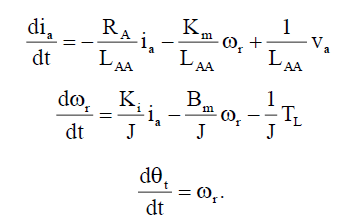

In [211]:
# % Obtención de la función de transferencia del motor
# pasivando TL, se tiene la Wr/VA como
@variables Va, Ra, La, Ia, Ki, Wr, Jm, Km, Bm, TL, s
Eqn1 = s*Ia ~ -(Ra/La)*Ia-(Km/La)*Wr+(1/La)*Va
#res01=solve(Eqn1,Ia)
Ia_ = Symbolics.solve_for(Eqn1, Ia)
Eqn2 = s*Wr ~ (Ki/Jm)*Ia_-(Bm/Jm)*Wr
Wr_Va = Symbolics.solve_for(Eqn2, Wr)
print(`Wr_Va=`)
Wr_Va = Symbolics.simplify(Wr_Va)

`Wr_Va=`

(Ki*Va) / (Bm*Ra + Ki*Km + Bm*La*s + Jm*Ra*s + Jm*La*(s^2))

%`Wr_Va=`
 \begin{equation}
\frac{Ki Va}{Bm Ra + Ki Km + Bm La s + Jm Ra s + s^{2} Jm La}
\end{equation}%

In [ ]:
# % Obtención de la función de transferencia del motor
# pasivando Va, se tiene la Wr/TL como
Eqn3 = s*Ia ~ - (Ra/La)*Ia - (Km/La)*Wr
Ia_ = Symbolics.solve_for(Eqn3, Ia)
Eqn4 = s*Wr ~ (Ki/Jm)*Ia_ - (Bm/Jm)*Wr - (1/Jm)*TL
Wr_TL = Symbolics.solve_for(Eqn4, Wr)
print(`Wr_TL=`)
Wr_TL = Symbolics.simplify(Wr_TL)

`Wr_TL=`

((-Ra - La*s)*TL) / (Bm*Ra + Ki*Km + Bm*La*s + Jm*Ra*s + Jm*La*(s^2))

%`Wr_TL=`
 \begin{equation}
\frac{\left(  - Ra - La s \right) TL}{Bm Ra + Ki Km + Bm La s + Jm Ra s + s^{2} Jm La}
\end{equation}%

https://discourse.julialang.org/t/solve-differential-equation-algebraically/106352/3

In [ ]:
# julia> using SymPy
# julia> @syms x
# (x,)
# julia> y = sympy.Function("y")
# PyObject y
# julia> result = dsolve(sympy.Derivative(y(x), x) -  2*y(x)/x)
#            2
# y(x) = C₁⋅x
#

In [ ]:
Pkg.add("SymPy") #46 s en Colab

In [214]:
using SymPy

In [ ]:
#julia> using SymPy
#julia> @syms x
# (x,)
# julia> y = sympy.Function("y")
# PyObject y
# julia> result = dsolve(sympy.Derivative(y(x), x) -  2*y(x)/x)
#            2
# y(x) = C₁⋅x
# https://discourse.julialang.org/t/solve-differential-equation-algebraically/106352
#

In [215]:
@SymPy.syms x

(x,)

In [216]:
y = sympy.Function("y")

y

In [217]:
y_p =sympy.Derivative(y(x), x)

d       
──(y(x))
dx      

In [257]:
 -2*y(x)*x^2

    2     
-2⋅x ⋅y(x)

# **Cicuito R-L-C**




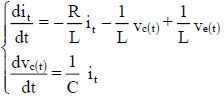

In [261]:
# % Obtención de la función de transferencia de Vc
@variables R, L, C, Is, Vc, Ve
Eqn1 = s*Is ~ -(R/L)*Is-(1/L)*Vc+(1/L)*Ve
Is_ = Symbolics.solve_for(Eqn1, Is)
Eqn2 = s*Vc ~ (1/C)*Is_
Vc_Ve = Symbolics.solve_for(Eqn2, Vc)
print(`Vc_Ve=`)
Vc_Ve = Symbolics.simplify(Vc_Ve)

`Vc_Ve=`

1 / (1 + C*R*s + C*L*(s^2))

 \begin{equation}
\frac{Ve}{1 + C R s + s^{2} C L}
\end{equation}


In [260]:
# % Obtención de la función de transferencia de Is
@variables R, L, C, Is, Vc, Ve
Eqn1 = s*Vc ~ (1/C)*Is
Vc_ = Symbolics.solve_for(Eqn1, Vc)
Eqn2 = s*Is ~ -(R/L)*Is-(1/L)*Vc_+(1/L)*Ve
Is_Ve = Symbolics.solve_for(Eqn2, Is)
print(`Is_Ve=`)
Is_Ve = Symbolics.simplify(Is_Ve)

`Is_Ve=`

(-C*Ve*s) / (-(1//1) - C*R*s - C*L*(s^2))

 \begin{equation}
\frac{ - C Ve s}{-1 - C R s - s^{2} C L}
\end{equation}


# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />